# 随机抽样

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数，如正态分布、泊松分布等。

- numpy.random.seed(seed = None)

`seed()`用于指定对技术生成时所用算法开始的整数值，如果使用相同的`seed()`值，则每次生成的随机数都相同，如果不设置这个值，则系统根据时间来自己选择这个值，此时每次生成的随机数因时间差异而不同。

在对数据进行预处理时，经常加入新的操作或改变处理策略，此时如果伴随着操作，最好还是指定唯一的随机种子，避免由于随机的差异对结果产生影响

# 离散型随机变量
## 二项分布

 

二项分布可以用于只有一次实验只有两种结果，各结果对应的概率相等的多次实验的概率问题，

$$ c_{n}^{k} \times p^k \times (1-p)^{n - k} $$

二项分布概率的代码表示：

`binom.pmf(k) = choose(n, k) p ** k (1 - p) ** (n - k)`

- `numpy.random.binomial(n, p, size = None)`

表示对一个二项分布进行采样，`size`表示采样的次数，`n`表示做了`n`重伯努利试验，`p`表示成功的概率，函数的返回值表示`n`中成功的次数

【例】野外正在进行9（n=9）口石油勘探井的发掘工作，每一口井能够开发出油的概率时0.1（p = 0.1)。请问，最终所有的勘探井都勘探失败的概率

0.3897


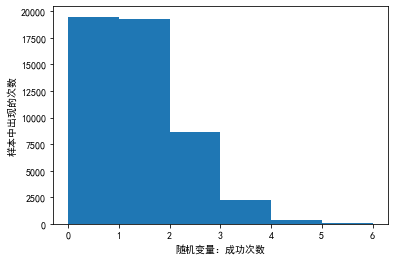

[0.387 0.387 0.172 0.045 0.007 0.001 0.    0.    0.    0.   ]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

np.random.seed(20200605)
n = 9 # 做某件事情的次数
p = 0.1 # 做某件事情成功的概率
size = 50000
x= np.random.binomial(n, p, size)
'''
或者使用binom.rvs
使用binom.rvs(n, p, size = 1)函数摸拟一个二项随机变量，可视化地表现概率
y = stats.binom.rvs(n, p, size = size)返回一个numpy.ndarray
'''
print(np.sum(x == 0) / size)

plt.hist(x, range(7))
plt.xlabel('随机变量：成功次数')
plt.ylabel('样本中出现的次数')
plt.show()

#它返回一个列表，列表中每个元素表示随机变量中对应值的概率
s = stats.binom.pmf(range(10), n, p)
print(np.around(s, 3))

【例】摸拟投硬币，投两次，问两次都为正面的概率

0.25154
0.49874
0.24972


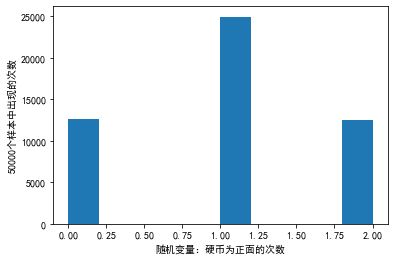

[0.25 0.5  0.25]


In [35]:
np.random.seed(20200605)
n = 2 # 做某件事情的次数，这里是头两次硬币
p = 0.5 # 某件事情成功的概率，这里为投硬币为正面的概率
size = 50000
x = np.random.binomial(n, p, size)

print(np.sum(x == 0) / size)
print(np.sum(x == 1) / size)
print(np.sum(x == 2) / size)

plt.hist(x)
plt.xlabel('随机变量：硬币为正面的次数')
plt.ylabel('50000个样本中出现的次数')
plt.show()

#它返回一个列表，列表中每个元素表示随机变量中对应值的概率
s = stats.binom.pmf(range(n + 1), n, p)
print(np.around(s, 3)) 

计算期望和方差

期望：E(x) = np

方差：Var(x) = np(1 - p)

利用stats.binom.stats(n, p, loc = 0, moments = 'mv')计算期望和方差

moments参数中，m为期望，v为方差

# 泊松分布

泊松分布主要用于估计某个时间段某时间发生的概率

泊松概率函数的代码表示：

poisson.pmf(k) = exp(-lam) lam * k / k!

泊松分布的数学表示：

$$ \frac{\lambda ^ k} {k!} e^{-\lambda}, k = 0, 1...$$

- `numpy.random.poisson(lam = 1.0, size = None)`

表示对一个泊松分布进行采样，`size`表示采样的次数，`lam`表示一个单位内发生事情的平均值，函数的返回值表示一个单位内时间发生的次数

【例】假定某航空公司预定票处平均没小时接到42次订票电话，那么10分钟内恰好接到6次电话的概率是多少

0.14988


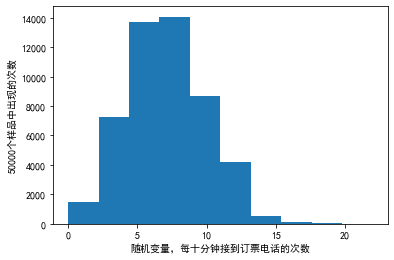

0.14900277967433773


In [41]:
np.random.seed(20200605)
lam = 42 / 6 # 平均值：平均每10分钟接到42/6次订票电话
size = 50000
x = np.random.poisson(lam, size)
'''
摸拟服从泊松分布的50000个随机变量
x = stats.poisson.rvs(lam, size = size)
'''

print(np.sum(x == 6) / size) 

plt.hist(x)
plt.xlabel('随机变量，每十分钟接到订票电话的次数')
plt.ylabel('50000个样品中出现的次数')
plt.show()

#用possion.pmf(k, mu)求对应分布的概率：概率质量函数（PMF)
x = stats.poisson.pmf(6, lam)
print(x)

## 超几何分布

在超几何分布中，各次实验不是独立的，各次实验成功的概率也不等。
超几何分布概率函数的数学表示：

N件产品中有M件不合格品，，在产品中随机抽n件做检查，发现k件不合格品的概率为：

$$ P(X = k) = \frac {C^k_M C^{m - k}_{N-M}} {C_N^m},k = 0, 1, ,2...min(n, M)$$


- `numpy.random.hypergeometric(ngood, nbad, nsample, size=None)` Draw samples from a Hypergeometric distribution.

表示对一个超几何分布进行采样，`size`表示采样的次数，`ngood`表示总体中具有成功标志的元素个数，`nbad`表示总体中不具有成功标志的元素个数，`ngood+nbad`表示总体样本容量，`nsample`表示抽取元素的次数（小于或等于总体样本容量），函数的返回值表示抽取`nsample`个元素中具有成功标识的元素个数。


【例】一共20只动物里有7只是狗，抽取12只有3只狗的概率（无放回抽样）。

0.198664


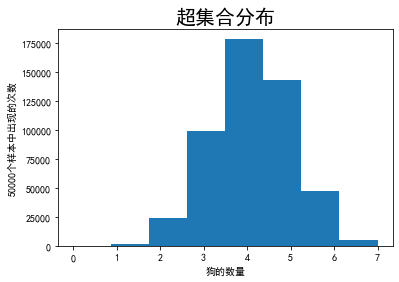

[0.    0.004 0.048 0.199 0.358 0.286 0.095 0.01 ]


In [43]:
np.random.seed(20200605)
size = 500000
x = np.random.hypergeometric(ngood = 7, nbad = 13, nsample = 12, size = size)
'''
或者用
rvs(M, n, N, loc = 0, size = 1, random_state = None)摸拟
x = stats.hypergeom.rvs(M = 20, n = 7, N = 12, size = size)
'''

print(np.sum(x == 3) / size) 

plt.hist(x, bins = 8)
plt.xlabel('狗的数量')
plt.ylabel('50000个样本中出现的次数')
plt.title('超几何4分布', fontsize = 20)
plt.show()

"""
M 为总体容量
n 为总体中具有成功标志的元素的个数
N,k 表示抽取N个元素有k个是成功元素
"""
x = range(8)
#用hypergeom.pmf(k, M, n, N, loc)来计算k次成功的概率
s = stats.hypergeom.pmf(k=x, M=20, n=7, N=12)
print(np.round(s, 3))

超几何分布的均值与方差

均值E(x) = N(n/M)

方差Var(x) = N(n/M)(1-n/M)((M-N)/(M-1))

注释：考虑n次实验的超几何分布，令p=n/M,当总体容量足够大时((M-N)/(M-1))近似于1，此时数学期望为Np，方差为Np(1-p).

#用stats(M, n, N, loc=0, moments='mv')计算均值和方差

stats.hypergeom.stats(20,7,12,moments='mv')

# 其他随机函数

## 随机从序列中获取元素

- `numpu.random.choice(a, size = None, replace = True, p = None)`

从序列中获取元素，若`a`为整数，元素取值从`np.range(a)`中随机获取；若`a`为数组，取值从`a`数组元素中随机获取。该函数还可以控制生成数组中的元素是否重复`replace`，以及选取元素的概率`p`

In [44]:
np.random.seed(20200614)
x = np.random.choice(10, 3)
print(x)

x = np.random.choice(10, 3, p = [0.05, 0, 0.05, 0.9, 0, 0, 0, 0, 0, 0])
print(x)

x = np.random.choice(10, 3, replace = False, p = [0.05, 0, 0.05, 0.9, 0, 0, 0, 0, 0, 0])
print(x)

aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
x = np.random.choice(aa_milne_arr, 5, p = [0.5, 0.1, 0.1, 0.3])
print(x)

np.random.seed(20200614)
x = np.random.randint(0, 10, 3)
print(x)

[2 0 1]
[3 2 3]
[3 0 2]
['pooh' 'rabbit' 'pooh' 'pooh' 'pooh']
[2 0 1]


## 对数据进行洗牌操作

数据一般都是按照采集顺序排列的，但是在机器学习中很多算法都要求数据之间相互独立，所以需要先对数据集进行洗牌操作

- `numpy.random.shuffle(x)`

对`x`进行重排序，如果x为多为数组，只沿第0轴洗牌，改变原来的数组，输出为None


In [45]:
np.random.seed(20200614)
x = np.arange(10)
np.random.shuffle(x)
print(x)

print(np.random.shuffle([1, 34, 9, 12, 15]))

x = np.arange(20).reshape((5, 4))
print(x)

np.random.shuffle(x)
print(x)

[6 8 7 5 3 9 1 4 0 2]
None
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]
 [16 17 18 19]
 [ 4  5  6  7]]


- `numpy.random.permutation(x)`
与`shuffle()`函数相同，可以打乱第0轴的数据，但是它不会改变原来的数组“

In [47]:
np.random.seed(20200614)
x = np.arange(10)
y = np.random.permutation(x)
print(y)

print(np.random.permutation([1, 4, 9, 12, 15]))

x = np.arange(20).reshape((5, 4))
print(x)

y = np.random.permutation(x)
print(y)

[6 8 7 5 3 9 1 4 0 2]
[ 4  1  9 15 12]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]
 [16 17 18 19]
 [ 4  5  6  7]]


# 练习
创建一个5 x 3的二维数组，包含5到10之间的随机数

In [48]:
x = np.random.randint(5, 10, [5, 3])
print(x)

x = np.random.uniform(5, 10, [5, 3])
print(x)

[[6 6 5]
 [6 8 8]
 [7 9 9]
 [6 6 7]
 [8 6 8]]
[[9.13477517 7.90190832 5.01204465]
 [7.25841789 9.54911823 5.05862277]
 [9.6214281  9.0346432  5.35105615]
 [9.88164525 7.65130301 6.04607113]
 [5.805795   9.65992556 7.33807103]]
